<a href="https://colab.research.google.com/github/leman-cap13/kaggle_datasets_/blob/main/student_depression_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
! pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset?select=student_depression_dataset.csv")

Skipping, found downloaded files in "./student-depression-dataset" (use force=True to force download)


In [ ]:
df=pd.read_csv('/content/student-depression-dataset/student_depression_dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [ ]:
df.isna().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [ ]:
df.dtypes

,0
id,int64
Gender,object
Age,float64
City,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64


In [ ]:
df=df.drop('id',axis=1)

In [ ]:
df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [ ]:
# mapping={
#     "'Less than 5 hours'":4,
#     "'5-6 hours'" :5.5,
#     "'7-8 hours'" : 7.5,
#     "'More than 8 hours'" :9,
#     "'Others'" : 11

# }

# df['Sleep Duration']=df['Sleep Duration'].map(mapping)
# df['Sleep Duration']

In [ ]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [ ]:
df['Degree'] = df['Degree'].astype(str).str.replace("'", "").str.strip()
df['Degree']

,Degree
0,B.Pharm
1,BSc
2,BA
3,BCA
4,M.Tech
...,...
27896,Class 12
27897,MSc
27898,MD
27899,Class 12


In [ ]:
def remove_outlier(df):
  num_columns=df.select_dtypes(include=np.number).columns
  for column in num_columns:
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df=df[(df[column]>=lower_bound) & ( df[column]<=upper_bound)]
  return df


In [ ]:
df1=remove_outlier(df)
df1

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,Class 12,Yes,10.0,5.0,No,1


In [ ]:
df1['Financial Stress']=df1['Financial Stress'].replace('?','0.0')

In [ ]:
df1['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '0.0'], dtype=object)

In [ ]:
df1['Financial Stress']=df1['Financial Stress'].replace("'",'')

In [ ]:
df1['Financial Stress']=df1['Financial Stress'].astype(float)

In [ ]:
X=df1.drop('Depression',axis=1)
y=df1['Depression'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_full,X_test,y_full,y_test=train_test_split(X,y, test_size=0.2, random_state=13)
X_train,X_valid,y_train,y_valid=train_test_split(X_full,y_full, test_size=0.2)

In [ ]:
num_feature=X_full.select_dtypes(include=np.number).columns
cat_feature=X_full.select_dtypes(exclude=np.number).columns

In [ ]:
num_feature

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')

In [ ]:
cat_feature

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [ ]:
num_pipeline=Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('encode', StandardScaler())
])

cat_pipeline=Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


cat_pipeline_ord=Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encode', OrdinalEncoder())
])

sleep_order = [
    "'Less than 5 hours'",
    "'5-6 hours'",
    "'7-8 hours'",
    "'More than 8 hours'",
    "Others"
]

cat_pipeline_sleep = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encode', OrdinalEncoder(categories=[sleep_order]))
])

transformer=ColumnTransformer([
    ('num', num_pipeline, num_feature),
    ('sleep', cat_pipeline_sleep, ['Sleep Duration']),
    ('cat', cat_pipeline_ord, ['Dietary Habits','Have you ever had suicidal thoughts ?','Degree'] ),
    ('cat1', cat_pipeline, cat_feature[~cat_feature.isin(['Dietary Habits', 'Sleep Duration','Have you ever had suicidal thoughts ?','Degree'])])
],remainder='passthrough')

estimator=RandomForestClassifier(max_depth=10, min_samples_split=5)

full_pipeline=Pipeline([
    ('preprocessing', transformer),
    ('estimator', estimator)
])

In [ ]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('encode',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')),
                                                 ('sleep',
                                                  Pipeline(...
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Degree']),
                                                 ('cat1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'City', 'Profession', 'Family History of Mental Illness'], dtype='object'))])),
                ('estimator',
                 RandomForestClassifier(max_depth=10, min_samples_split=5))])

In [ ]:
full_pipeline.score(X_test,y_test)

0.8420014347202296

In [ ]:
full_pipeline.score(X_valid,y_valid)

0.8457744900246581

In [ ]:
full_pipeline.score(X_train,y_train)

0.8703548007398688

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=7, min_samples_split=6)


In [ ]:
full_pipeline_1=Pipeline([
    ('preprocessing', transformer),
    ('estimator', model)
])

In [ ]:
full_pipeline_1.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('encode',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')),
                                                 ('sleep',
                                                  Pipeline(...
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Degree']),
                                                 ('cat1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'City', 'Profession', 'Family History of Mental Illness'], dtype='object'))])),
                ('estimator',
                 DecisionTreeClassifier(max_depth=7, min_samples_split=6))])

In [ ]:
full_pipeline_1.score(X_test,y_test)

0.8333931133428981

In [ ]:
full_pipeline_1.score(X_valid,y_valid)

0.8285137861466039

In [ ]:
full_pipeline_1.score(X_train,y_train)

0.8482147861666947

In [ ]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression()


In [ ]:
full_pipeline_3=Pipeline([
    ('preprocessing', transformer),
    ('estimator', model_2)
])

In [ ]:
full_pipeline_3.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('encode',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')),
                                                 ('sleep',
                                                  Pipeline(...
                                                  ['Dietary Habits',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Degree']),
                                                 ('cat1',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'City', 'Profession', 'Family History of Mental Illness'], dtype='object'))])),
                ('estimator', LogisticRegression())])

In [ ]:
full_pipeline_3.score(X_test,y_test)

0.849713055954089

In [ ]:
full_pipeline_3.score(X_valid,y_valid)

0.8459986550100874

In [ ]:
full_pipeline_3.score(X_train,y_train)

0.8480466341572782

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier([
    ('rfr_clf', estimator),
    ('xgb_clf', xgb),
    ('lr_clf', model_2)
], voting='soft')

In [ ]:
full_pipeline_voting=Pipeline([
    ('preprocessing', transformer),
    ('estimator', voting_clf)
])

In [ ]:
full_pipeline_voting.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('encode',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress'],
      dtype='object')),
                                                 ('sleep',
                                                  Pipeline(...
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=5,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...)),
                                              ('lr_clf', LogisticRegression())],
                                  voting='soft'))])

In [ ]:
full_pipeline_voting.score(X_test,y_test)

0.8475609756097561

In [ ]:
full_pipeline_voting.score(X_train,y_train)

0.865029987108346

In [ ]:
full_pipeline_voting.score(X_valid,y_valid)

0.8435328401703653

In [ ]:
X_train_prepared=pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
X_valid_prepared=pd.DataFrame(transformer.transform(X_valid),columns=transformer.get_feature_names_out())
X_test_prepared=pd.DataFrame(transformer.transform(X_test),columns=transformer.get_feature_names_out())

In [ ]:
X_train_prepared

,num__Age,num__Academic Pressure,num__Work Pressure,num__CGPA,num__Study Satisfaction,num__Job Satisfaction,num__Work/Study Hours,num__Financial Stress,sleep__Sleep Duration,cat__Dietary Habits,...,cat1__Profession_Architect,cat1__Profession_Chef,cat1__Profession_Doctor,cat1__Profession_Entrepreneur,cat1__Profession_Lawyer,cat1__Profession_Pharmacist,cat1__Profession_Student,cat1__Profession_Teacher,cat1__Family History of Mental Illness_No,cat1__Family History of Mental Illness_Yes
0,-0.167386,1.351478,0.0,-1.484974,1.509941,0.0,-1.121732,1.292707,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.058953,0.623225,0.0,0.180141,-0.689329,0.0,-1.661576,-0.793704,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.189336,1.351478,0.0,-0.358974,-0.689329,0.0,-0.851810,1.292707,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.650173,-1.561533,0.0,1.374382,0.776851,0.0,0.767721,-0.793704,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.241393,0.623225,0.0,0.077777,0.043761,0.0,-1.931498,-0.098234,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17836,-0.167386,-1.561533,0.0,-0.379447,1.509941,0.0,1.307565,-0.098234,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17837,1.672123,-1.561533,0.0,-0.713835,-0.689329,0.0,0.227878,-0.793704,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17838,0.241393,-0.833280,0.0,1.080940,0.776851,0.0,-1.121732,0.597237,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17839,0.241393,-0.105027,0.0,1.497219,0.043761,0.0,-1.661576,-1.489174,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
y_train.shape

(17841,)

In [ ]:
X_train_prepared.shape

(17841, 70)

In [ ]:
X_valid_prepared.shape

(4461, 70)

In [ ]:
y_valid.shape

(4461,)

In [ ]:
import tensorflow as tf


In [ ]:
model=tf.keras.Sequential()
for _ in range(10):
  model.add(tf.keras.layers.Dense(100,activation='relu', kernel_initializer='he_normal'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,nesterov=True),
              metrics=['accuracy'])

model.fit(X_train_prepared,y_train, epochs=10, validation_data=(X_valid_prepared,y_valid))

Epoch 1/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5270 - loss: 0.8175 - val_accuracy: 0.6508 - val_loss: 0.6439
Epoch 2/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6208 - loss: 0.6514 - val_accuracy: 0.7796 - val_loss: 0.5102
Epoch 3/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7145 - loss: 0.5623 - val_accuracy: 0.8079 - val_loss: 0.4458
Epoch 4/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7690 - loss: 0.5011 - val_accuracy: 0.8216 - val_loss: 0.4170
Epoch 5/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7828 - loss: 0.4786 - val_accuracy: 0.8294 - val_loss: 0.4002
Epoch 6/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8024 - loss: 0.4489 - val_accuracy: 0.8330 - val_loss: 0.3995
Epoch 7/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7980 - loss: 0.4508 - val_accuracy: 0.8384 - val_loss: 0.3830
Epoch 8/10
558/558 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8108 - loss: 0.4239 - val_accuracy: 0

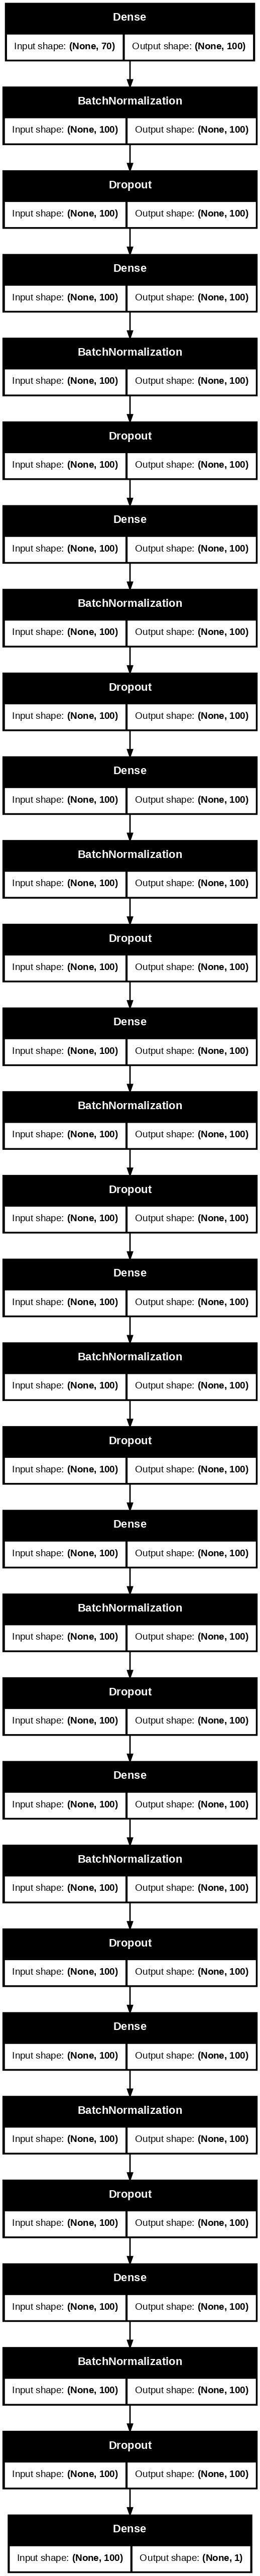

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=100)

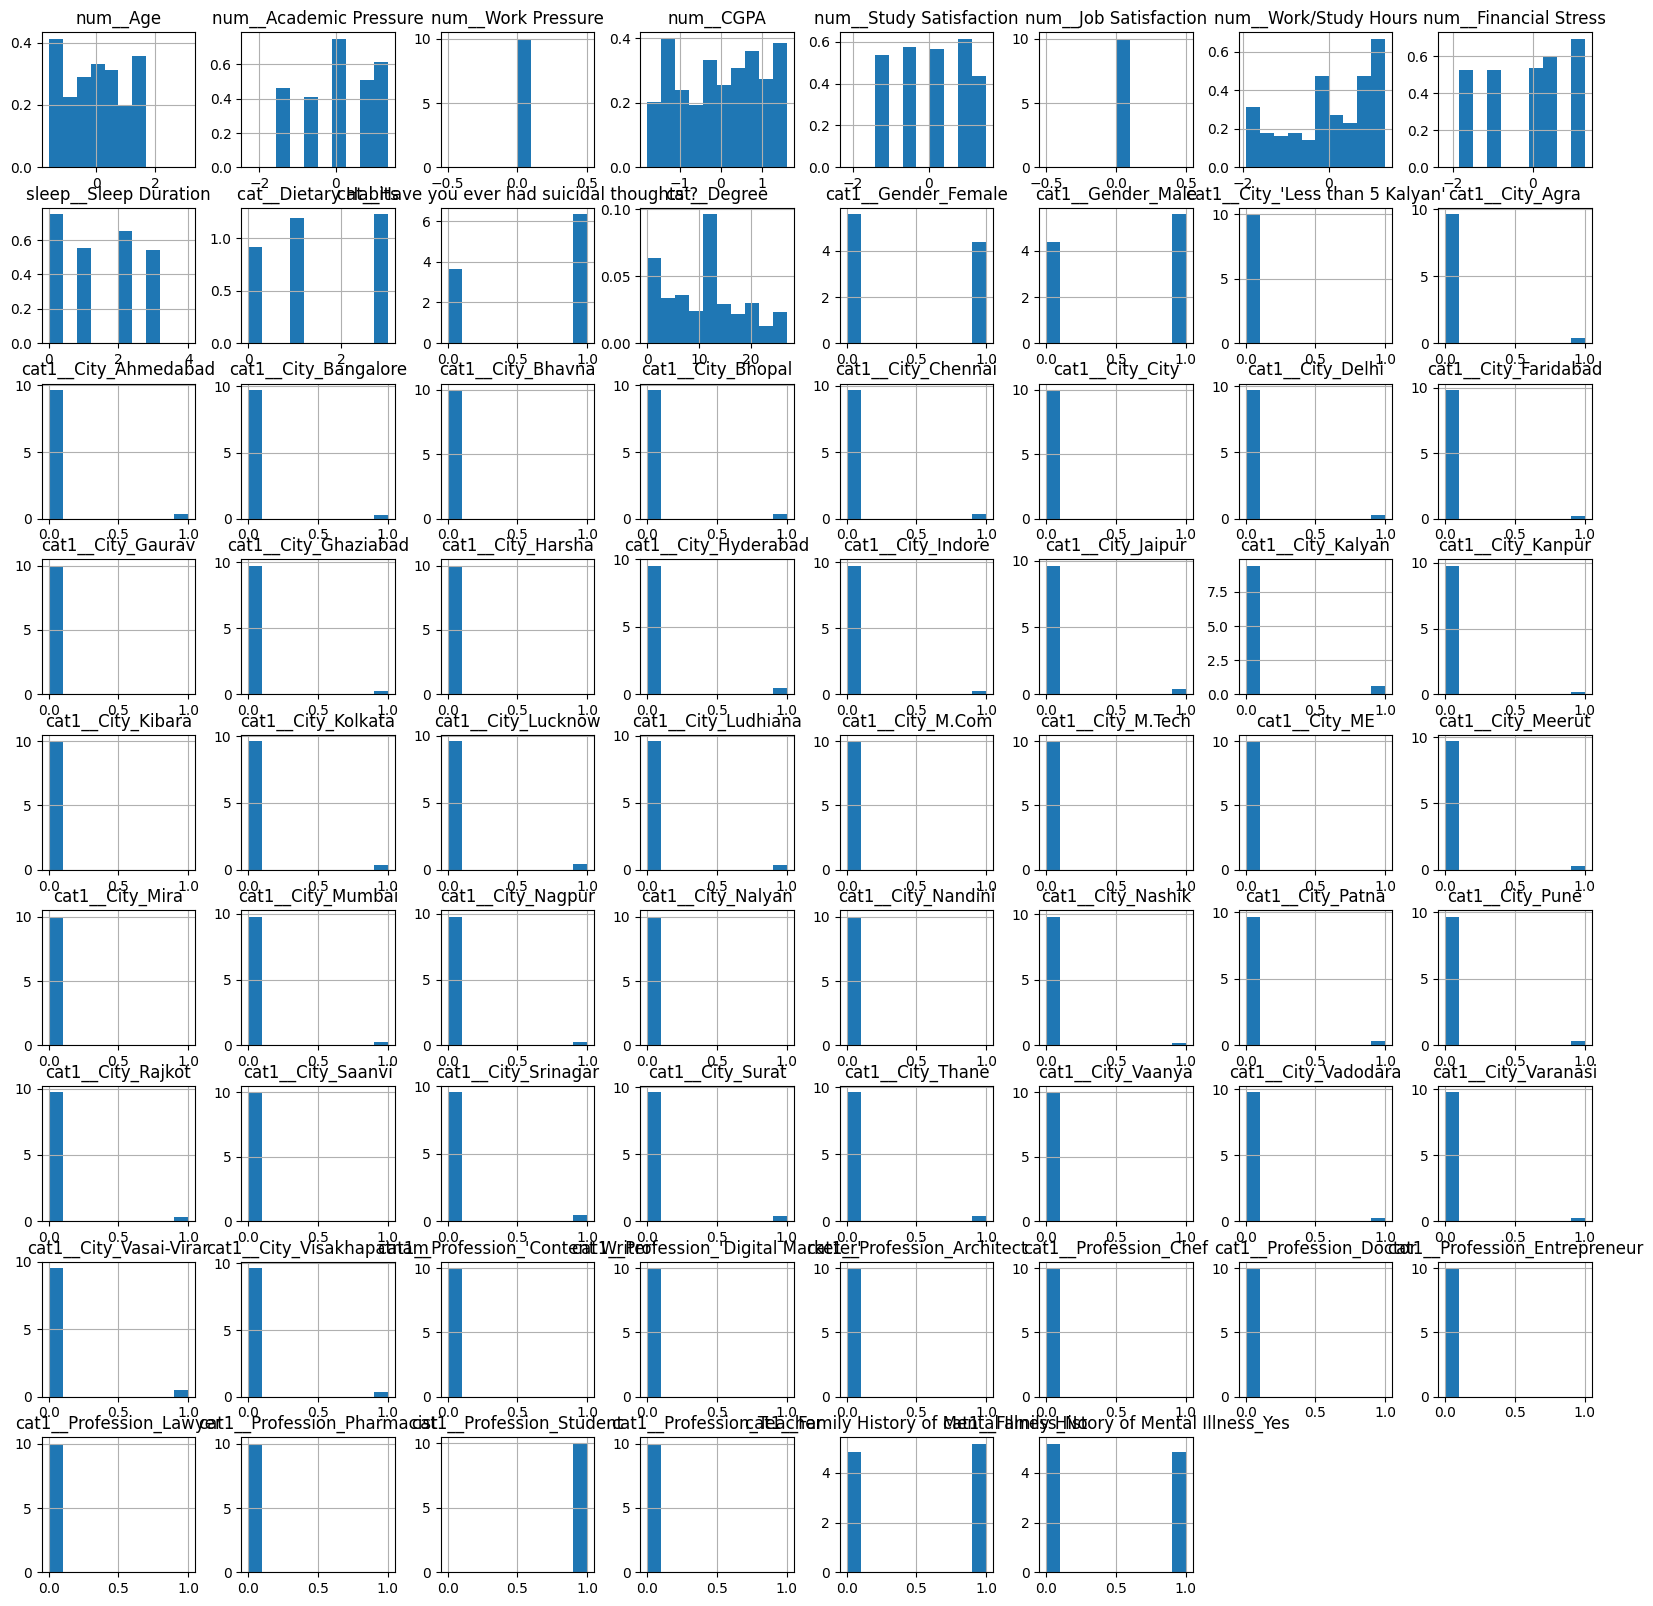

In [ ]:
X_train_prepared.hist(figsize = (20, 20), density = True);

In [ ]:
df_corr=df1.corr(numeric_only=True)

In [ ]:
df_corr

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.000000,-0.075671,NaN,0.005082,0.009231,NaN,-0.031981,-0.096511,-0.225679
Academic Pressure,-0.075671,1.000000,NaN,-0.025102,-0.112042,NaN,0.095920,0.152296,0.475038
Work Pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CGPA,0.005082,-0.025102,NaN,1.000000,-0.046712,NaN,0.002605,0.006542,0.021977
Study Satisfaction,0.009231,-0.112042,NaN,-0.046712,1.000000,NaN,-0.036410,-0.064524,-0.168131
Job Satisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work/Study Hours,-0.031981,0.095920,NaN,0.002605,-0.036410,NaN,1.000000,0.075100,0.208433
Financial Stress,-0.096511,0.152296,NaN,0.006542,-0.064524,NaN,0.075100,1.000000,0.363969
Depression,-0.225679,0.475038,NaN,0.021977,-0.168131,NaN,0.208433,0.363969,1.000000


In [ ]:
import seaborn as sns

<Axes: >

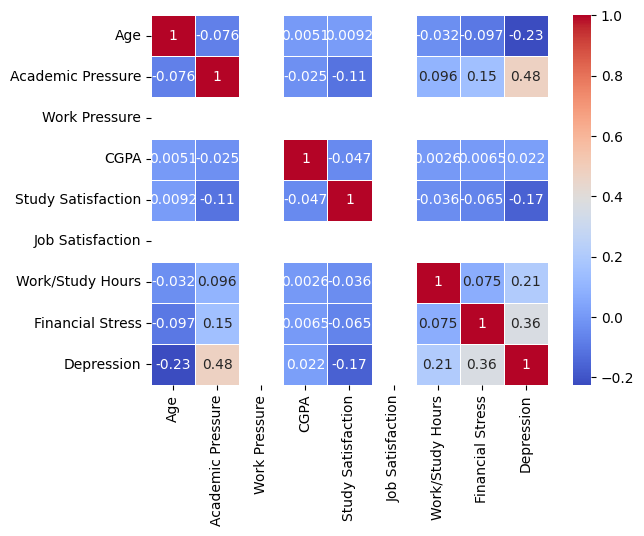

In [ ]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)

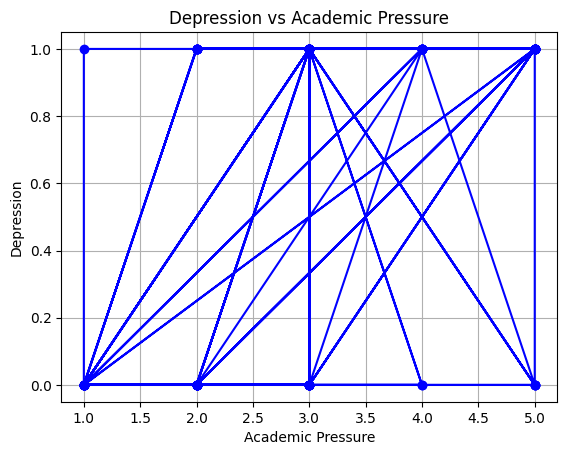

In [ ]:
plt.plot(df['Academic Pressure'].head(100), df['Depression'].head(100), marker='o', linestyle='-', color='b')
plt.xlabel('Academic Pressure')
plt.ylabel('Depression')
plt.title('Depression vs Academic Pressure')
plt.grid(True)
plt.show()


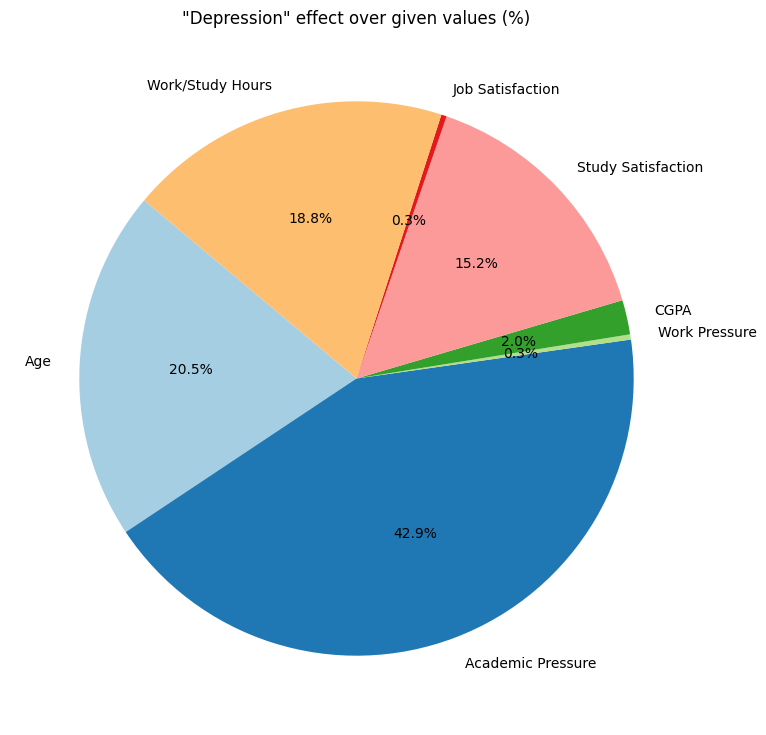

In [ ]:
correlation = df.corr(numeric_only=True)['Depression'].drop('Depression')

correlation_abs = correlation.abs()

total_effect = correlation_abs.sum()
effect_percent = (correlation_abs / total_effect) * 100

labels = effect_percent.index.tolist()
sizes = effect_percent.values
colors = plt.cm.Paired.colors

plt.figure(figsize=(9,9))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('"Depression" effect over given values (%)')
plt.show()
